In [1]:
#Importing required libraries
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
import glob
from glob import glob


C:\Users\rohit\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Merge images from both folders into one dictionary
import os
from glob import glob

base_skin_dir = 'C:/Users/rohit/OneDrive/Final_project'

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

imageid_path_dict

{'ISIC_0024306': 'C:/Users/rohit/OneDrive/Final_project\\Skin_images\\ISIC_0024306.jpg',
 'ISIC_0024307': 'C:/Users/rohit/OneDrive/Final_project\\Skin_images\\ISIC_0024307.jpg',
 'ISIC_0024308': 'C:/Users/rohit/OneDrive/Final_project\\Skin_images\\ISIC_0024308.jpg',
 'ISIC_0024309': 'C:/Users/rohit/OneDrive/Final_project\\Skin_images\\ISIC_0024309.jpg',
 'ISIC_0024310': 'C:/Users/rohit/OneDrive/Final_project\\Skin_images\\ISIC_0024310.jpg',
 'ISIC_0024311': 'C:/Users/rohit/OneDrive/Final_project\\Skin_images\\ISIC_0024311.jpg',
 'ISIC_0024312': 'C:/Users/rohit/OneDrive/Final_project\\Skin_images\\ISIC_0024312.jpg',
 'ISIC_0024313': 'C:/Users/rohit/OneDrive/Final_project\\Skin_images\\ISIC_0024313.jpg',
 'ISIC_0024314': 'C:/Users/rohit/OneDrive/Final_project\\Skin_images\\ISIC_0024314.jpg',
 'ISIC_0024315': 'C:/Users/rohit/OneDrive/Final_project\\Skin_images\\ISIC_0024315.jpg',
 'ISIC_0024316': 'C:/Users/rohit/OneDrive/Final_project\\Skin_images\\ISIC_0024316.jpg',
 'ISIC_0024317': 'C:/

In [3]:
# p_df = df.toPandas()
p_df = pd.read_csv('part-00000-e7fb6c92-1c50-4ee9-b83e-09c4151b2c39-c000.csv')

In [4]:
p_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis-like lesions


In [5]:
p_df['path'] = p_df['image_id'].map(imageid_path_dict.get)
p_df['path'] = p_df['path'].str.replace('\\', '/')
p_df

C:\Users\rohit\AppData\Local\Temp\ipykernel_27628\1102369938.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  p_df['path'] = p_df['path'].str.replace('\\', '/')


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,Actinic keratoses,C:/Users/rohit/OneDrive/Final_project/Skin_ima...
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,Actinic keratoses,C:/Users/rohit/OneDrive/Final_project/Skin_ima...
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,Actinic keratoses,C:/Users/rohit/OneDrive/Final_project/Skin_ima...
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,Actinic keratoses,C:/Users/rohit/OneDrive/Final_project/Skin_ima...


In [6]:
p_df['cell_type_idx'] = pd.Categorical(p_df['cell_type']).codes

In [7]:
p_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,path,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...,2


In [8]:
from PIL import Image
p_df['image'] = p_df['path'].map(lambda x: np.asarray(Image.open(x).resize((125,100))))

In [9]:
p_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,path,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...,2,"[[[189, 152, 194], [192, 156, 198], [191, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...,2,"[[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...,2,"[[[186, 127, 135], [189, 133, 145], [192, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...,2,"[[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...,2,"[[[131, 88, 110], [142, 97, 120], [152, 107, 1..."


In [10]:
# # IMP OpenCV add in main project
# !pip install cv2
# from cv2


# # Define a function to read and resize images using OpenCV
# def read_and_resize_image(image_path):
#     image = cv.imread(image_path)
#     if image is not None:
#         resized_image = cv.resize(image, (new_width, new_height))
#         return resized_image
#     else:
#         return None

# # Define the new dimensions for resizing
# new_width = 300
# new_height = 250

# # Apply the read_and_resize_image function to the DataFrame
# df["image"] = df["path"].apply(read_and_resize_image)

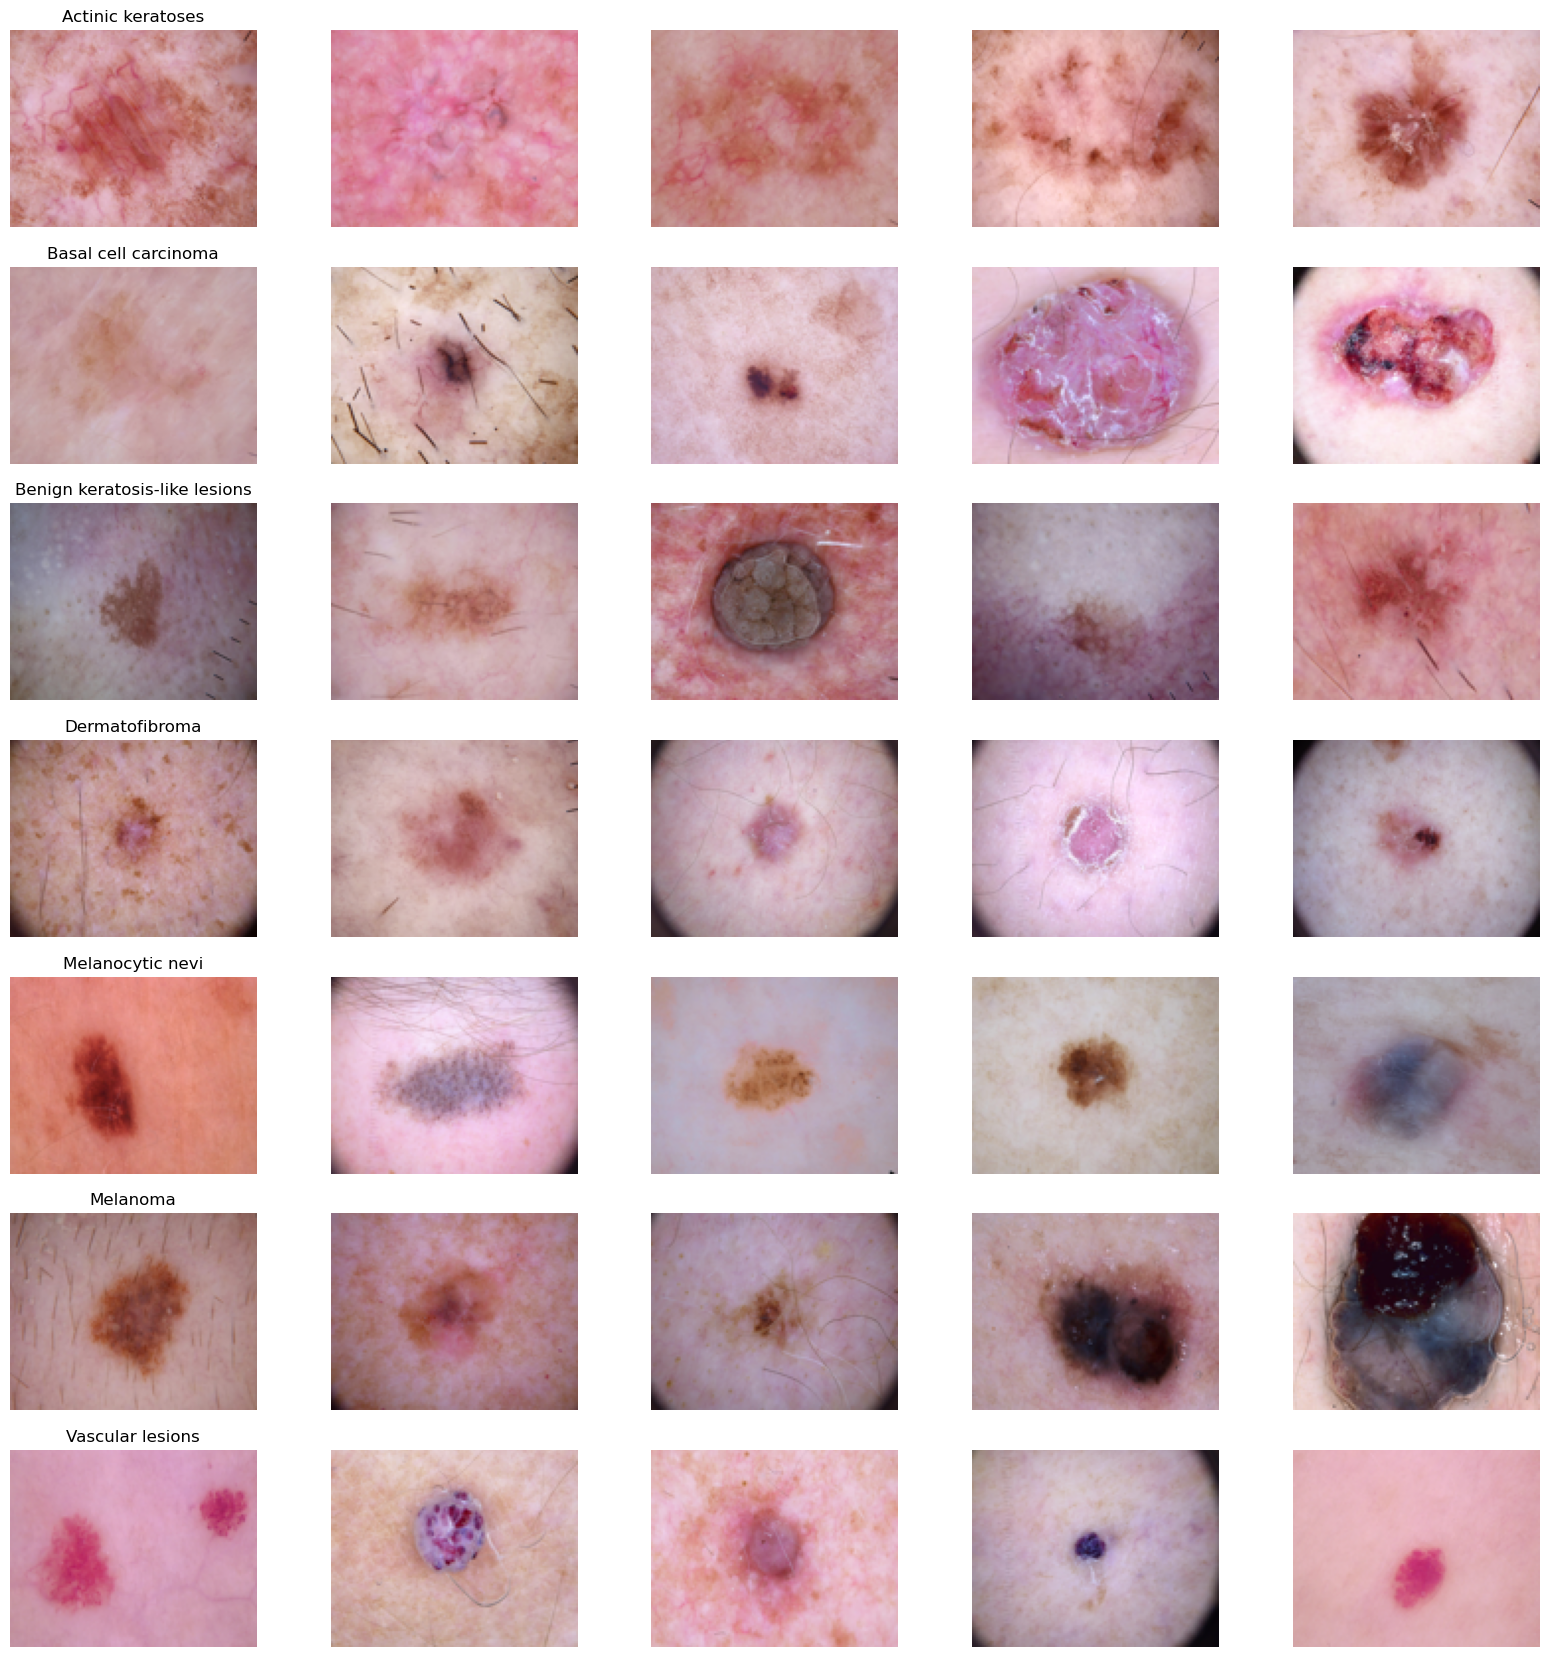

In [11]:
import matplotlib.pyplot as plt
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, p_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)


# Checking the image size distribution

In [12]:
# See the image size distribution - should just return one row (all images are uniform)
p_df['image'].map(lambda x: x.shape).value_counts()

(100, 125, 3)    10015
Name: image, dtype: int64

# Data Modeling


In [13]:
p_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'dataset', 'cell_type', 'path', 'cell_type_idx', 'image'],
      dtype='object')

# Setting Feature and target variable

In [14]:
features=p_df.drop(columns=['cell_type_idx'],axis=1)
target=p_df['cell_type_idx']

In [15]:
# Normalize pixel values to be between 0 and 1
#features['image'] = features['image']/255.0

In [16]:
features.head(1)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,C:/Users/rohit/OneDrive/Final_project/Skin_ima...,"[[[189, 152, 194], [192, 156, 198], [191, 154,..."


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix , classification_report
import tensorflow as tf
from tensorflow.keras.metrics import Recall
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam ,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Splitting the Dataset

In [18]:
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(features, target, test_size=0.25,random_state=800)
tf.unique(x_train_a.cell_type.values)

Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Melanocytic nevi', b'Melanoma', b'Benign keratosis-like lesions',
       b'Basal cell carcinoma', b'Vascular lesions', b'Actinic keratoses',
       b'Dermatofibroma'], dtype=object)>, idx=<tf.Tensor: shape=(7511,), dtype=int32, numpy=array([0, 0, 1, ..., 0, 1, 0])>)

# Normalization of images

Why Normalize Images:

Stable Training: Neural networks, including CNNs, are sensitive to the scale of input data. Normalizing images prevents features with larger ranges from dominating the learning process and helps in achieving more stable and efficient training.

Gradient Descent Convergence: Gradient-based optimization algorithms, like stochastic gradient descent, work better when the features have similar scales. Normalized features lead to more consistent updates during training, which helps the optimization process converge faster.

Activation Functions: Some activation functions, like the sigmoid and tanh functions, work most effectively when the input values are within a certain range (typically around 0). Normalizing input data can help prevent saturation and improve the overall behavior of these functions.

Regularization: Normalization can act as implicit regularization by preventing large weights that might occur when working with non-normalized data. This can improve the model's generalization to new, unseen data.

- How to Normalize Images:

The most common method for normalizing images involves scaling the pixel values to a range that is centered around zero and has a small standard deviation. This is typically achieved using the following steps:

Zero-Centering: Subtract the mean pixel value (across all images in the dataset) from each pixel value. This centers the data around zero.

Scaling: Divide the centered pixel values by the standard deviation (or a fixed value, like 255 for pixel values in the range [0, 255]). This scales the data to have a small range of values.

In [19]:
x_train = np.asarray(x_train_a['image'].tolist())
x_test = np.asarray(x_test_a['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

# One hot encoding on labels


The main reasons for using one-hot encoding on the target column (labels) in a classification task, which can also apply to CNNs, are as follows:

Categorical Representation: When dealing with classification tasks, the target variable often represents different classes or categories. By one-hot encoding, you represent each class as a binary vector, where each element corresponds to a class and is either 1 (if the instance belongs to that class) or 0 (if it doesn't). This categorical representation ensures that the model understands the discrete nature of the classes and avoids any unintended ordinal relationships between them.

Loss Function and Gradient Descent: Most neural networks, including CNNs, are trained using gradient-based optimization techniques. These optimization techniques require a loss function to compute the error between the predicted values and the actual labels. One-hot encoded labels work well with categorical cross-entropy loss, which is a common choice for multi-class classification problems. This loss function expects the target and predicted values to have the same shape, which is achieved using one-hot encoded labels.

Network Output and Activation: CNNs usually have a softmax activation function in the output layer for multi-class classification. The softmax function converts raw scores (logits) into a probability distribution over classes. One-hot encoded labels match the shape and format expected by the softmax activation, simplifying the architecture's design and ensuring compatibility.

Evaluation and Metrics: After training the model, you'll want to evaluate its performance on a validation or test dataset. Common metrics like accuracy, precision, recall, and F1-score are calculated based on the predicted class labels and the true class labels. One-hot encoding facilitates the comparison of predicted labels with the true labels, enabling accurate evaluation of the model's performance.

In [20]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_a, num_classes = 7)
y_test = to_categorical(y_test_a, num_classes = 7)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# Why Splitting is Important:

Model Evaluation: You need a way to assess your model's performance on data it hasn't seen before. The validation set provides a realistic estimate of how well your model will generalize to new, unseen data.

Hyperparameter Tuning: During model development, you might adjust hyperparameters (e.g., learning rate, regularization strength). The validation set helps you select the best hyperparameters by evaluating their impact on validation performance.

Overfitting Prevention: Overfitting occurs when a model learns to perform well on the training data but fails to generalize to new data. The validation set helps detect overfitting; if your model's performance on the validation set starts to degrade while the training performance continues to improve, it's a sign of overfitting.

Splitting Strategies:

Train-Validation Split: This is the most basic method. You split your dataset into two parts: a training set (used for training the model) and a validation set (used for evaluating the model's performance during training). The typical split ratio is around 70-80% for training and 20-30% for validation.

K-Fold Cross-Validation: In k-fold cross-validation, you divide the dataset into k subsets (folds). You train and validate your model k times, each time using a different fold as the validation set and the remaining folds as the training set. This provides a more robust estimate of the model's performance.

Stratified Splitting: Stratified splitting is important when dealing with imbalanced datasets (where one class is much more prevalent than others). It ensures that the distribution of classes in both the training and validation sets mirrors the overall distribution.

Time Series Splitting: For time series data, a simple random split might not be appropriate. Instead, you would typically use a technique like "rolling window" or "expanding window" to simulate real-world deployment scenarios.


Here, features are your input data, labels are the corresponding target labels, and test_size determines the proportion of data allocated to the validation set.

In [21]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 500)

In [22]:
# Reshape image in 3 dimensions (height = 100px, width = 125px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))

# CNN
CNN is ideal for image classification. It is better since CNN has features parameter sharing and dimensionality reduction. Because of parameter sharing in CNN, the number of parameters is reduced thus the computations get decreased.

The CNN model is a repeated network of the following layers:
- Convolutional
- Pooling
- Dropout
- Flatten
- Dense
- Optimizer: Adam

Activation function used: Softmax

In [23]:
# input_shape = (100, 125, 3)
# num_classes = 7

# model = Sequential()
# model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
# model.add(Conv2D(64,kernel_size=(3, 3), activation='relu',padding = 'Same',))
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
# model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(256, (3, 3), activation='relu',padding = 'Same'))
# model.add(Conv2D(256, (3, 3), activation='relu',padding = 'Same'))
# model.add(Conv2D(256, (3, 3), activation='relu',padding = 'Same'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(512, (3, 3), activation='relu',padding = 'Same'))
# model.add(Conv2D(512, (3, 3), activation='relu',padding = 'Same'))
# model.add(Conv2D(512, (3, 3), activation='relu',padding = 'Same'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(2688, activation='relu'))
# model.add(Dense(1536, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))
# model.summary()


# 
Total params: This represents the total number of parameters (weights and biases) in your model, both trainable and non-trainable.

Trainable params: This is the number of parameters that will be updated during training through backpropagation. These are the learnable parameters that the model adjusts to minimize the loss function.

Non-trainable params: These are parameters that are not updated during training. They might include parameters from layers like BatchNormalization, which have moving statistics that are not learned but play a role in normalization during inference.

In [24]:
input_shape = (100, 125, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.16))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size=(3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(128, (3, 3), activation='relu',padding = 'same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(256, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2))) 2
model.add(Dropout(0.3))

model.add(Flatten()) 
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 125, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 125, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 125, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 62, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 62, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 62, 64)        18496     
                                                        

In [25]:
# Define the optimizer
optimizer = tf.keras.optimizers.legacy.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

C:\Users\rohit\anaconda3\lib\site-packages\keras\src\optimizers\legacy\adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [27]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# using early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# ADAM optimizer
lr (learning rate): This parameter controls the step size at which the optimizer adjusts the model's weights based on the gradient of the loss function. A larger learning rate can speed up convergence, but if it's too large, it might cause the optimization process to diverge.

beta_1 and beta_2: These parameters control the exponential decay rates for the moving averages of the gradient and its squared gradient, respectively. They influence how past gradient information is used to update the model's weights. beta_1 is typically close to 1, while beta_2 is close to 1 but smaller.

epsilon: A small constant added to the denominator to prevent division by zero. It stabilizes the division when the accumulated squared gradients are very small.

decay: This parameter controls the learning rate decay over each update. It reduces the learning rate over time, which can help fine-tune the optimization process.

amsgrad: If set to True, the Adam optimizer uses the AMSGrad variant, which adjusts the moving average of squared gradients to prevent rapid decay. This can make the optimization process more stable.


# Training the Model:

We're using the fit function to train the model. Here's what each argument in the fit function call does:

x_train and y_train: Training data (input features and corresponding labels).

batch_size: The number of samples per gradient update. This parameter affects memory usage and training speed.

epochs: The number of times the model iterates over the entire training dataset.

verbose: Controls the verbosity of the training progress output. 1 means you'll see training progress for each epoch.

steps_per_epoch: The number of steps (batches) per epoch. This parameter is used to define how many batches to process before considering an epoch complete.

validation_data: Validation data (input features and corresponding labels) used to evaluate the model's performance during training.

# ReduceLROnPlateau:
The ReduceLROnPlateau callback reduces the learning rate when a monitored metric (e.g., validation loss) stops improving. This can help fine-tune training as the model converges.

# Data augmentation to prevent overfitting


Data augmentation is a technique used to artificially increase the diversity of your training dataset by applying various transformations to the original data. This helps your model generalize better to new and unseen data, and it can improve the model's performance and robustness.

Data augmentation is a powerful tool, but it's important to strike a balance – applying too many augmentations might lead to unrealistic data that doesn't reflect the true distribution of your dataset.


In [28]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,        # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2,         # Randomly zoom image 
        shear_range=0.2,          # Apply shear transformations
        width_shift_range=0.2,    # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,   # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,     # randomly flip images
        vertical_flip=True  ,      # randomly flip images
        fill_mode='nearest')      # Fill newly created pixels after transformations

datagen.fit(x_train)

In [29]:
# Using both early_stopping,learning_rate_reduction
epochs = 5
batch_size = 10
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[early_stopping,learning_rate_reduction])

Epoch 1/5
675/675 [==============================] - 399s 589ms/step - loss: 1.0590 - accuracy: 0.6678 - val_loss: 0.9960 - val_accuracy: 0.6396 - lr: 1.0000e-04
Epoch 2/5
675/675 [==============================] - 398s 589ms/step - loss: 0.9286 - accuracy: 0.6662 - val_loss: 0.9086 - val_accuracy: 0.6543 - lr: 1.0000e-04
Epoch 3/5
675/675 [==============================] - 394s 584ms/step - loss: 0.8945 - accuracy: 0.6749 - val_loss: 0.9006 - val_accuracy: 0.6543 - lr: 1.0000e-04
Epoch 4/5
675/675 [==============================] - 383s 568ms/step - loss: 0.8646 - accuracy: 0.6912 - val_loss: 0.8268 - val_accuracy: 0.6729 - lr: 1.0000e-04
Epoch 5/5
675/675 [==============================] - 392s 581ms/step - loss: 0.8407 - accuracy: 0.6934 - val_loss: 0.8186 - val_accuracy: 0.6822 - lr: 1.0000e-04


# SGD

In [30]:
# Define SGD optimizer with momentum
sgd_optimizer = SGD(learning_rate=0.0001,momentum=0.8)

# Compile the model with SGD optimizer
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
# Using both early_stopping,learning_rate_reduction
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[early_stopping,learning_rate_reduction])


Epoch 1/5
675/675 [==============================] - 397s 585ms/step - loss: 0.7946 - accuracy: 0.7045 - val_loss: 0.8464 - val_accuracy: 0.6782 - lr: 1.0000e-04
Epoch 2/5
675/675 [==============================] - 391s 579ms/step - loss: 0.7924 - accuracy: 0.7102 - val_loss: 0.8210 - val_accuracy: 0.6822 - lr: 1.0000e-04
Epoch 3/5
675/675 [==============================] - 388s 574ms/step - loss: 0.7911 - accuracy: 0.7080 - val_loss: 0.8512 - val_accuracy: 0.6822 - lr: 1.0000e-04
Epoch 4/5
675/675 [==============================] - 387s 573ms/step - loss: 0.7872 - accuracy: 0.7097 - val_loss: 0.8871 - val_accuracy: 0.6516 - lr: 1.0000e-04
Epoch 5/5
675/675 [==============================] - 387s 573ms/step - loss: 0.7798 - accuracy: 0.7081 - val_loss: 0.8351 - val_accuracy: 0.6755 - lr: 1.0000e-04


In [32]:
# using early stopping
loss1, accuracy1 = model.evaluate(x_test, y_test, verbose=1)
loss_v1, accuracy_v1 = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v1, loss_v1))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy1, loss1))
model.save("CNN_Model.h5")

24/24 [==============================] - 5s 196ms/step - loss: 0.8351 - accuracy: 0.6755
Validation: accuracy = 0.675532  ;  loss_v = 0.835056
Test: accuracy = 0.709665  ;  loss = 0.798141


C:\Users\rohit\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluate Model Performance:
The evaluate function is used to calculate the loss and accuracy of the model on the test and validation sets. It takes input data (x_test and x_validate) and corresponding ground truth labels (y_test and y_validate). The verbose argument controls the verbosity level during evaluation. The output of the evaluate function is assigned to loss and accuracy for the test set and loss_v and accuracy_v for the validation set.

Print Results:
The code then prints the evaluation results for both the validation and test sets. The accuracy and loss values are displayed using formatted strings.

Save Model:
Finally, the save method is used to save the trained model to a file named "CNN_Model.h5". The ".h5" extension indicates that the model will be saved in HDF5 format, which is a common format for storing Keras models.

# Plotting Confusion Matrices

24/24 [==============================] - 6s 196ms/step


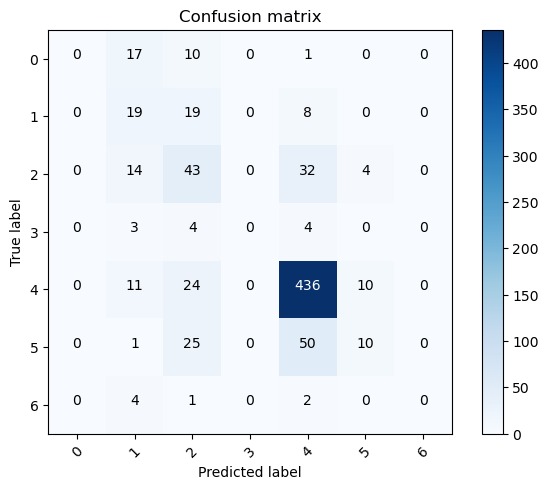

In [33]:
import itertools
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

79/79 [==============================] - 16s 208ms/step


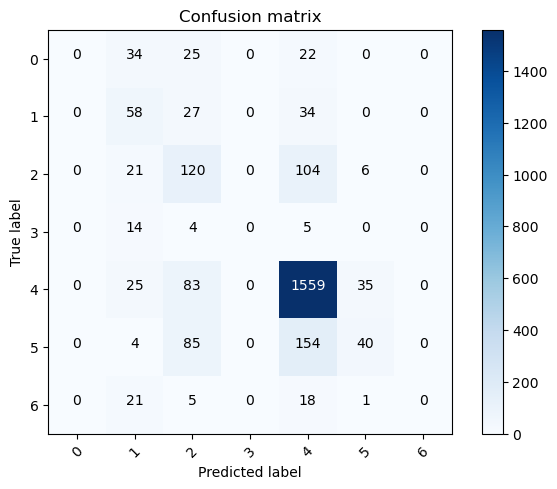

In [34]:
# Predict the values from the actual test data 
Y_pred = model.predict(x_test)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

In [35]:
# # Replace with your actual class labels (class_names[0] corresponds to class label 0, etc.)
# class_names = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

# # Create classification report
# report = classification_report(Y_true, Y_pred, target_names=class_names)

# # Print the classification report
# print("Classification Report:")
# print(report)